## PyTorch Tutorial #13 - Feed-Forward Neural Net

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

c:\Users\Leandro\source\repos\PyTorchTest\PyTorchTest\TorchEnv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Ejemplo de implementación de una red Feed-Forward

In [2]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
# hyper parameters
input_size = 784 # 28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [6]:
# MNIST
train_dataset = torchvision.datasets.MNIST(root = './data', train = True, transform = transforms.ToTensor(), download = True)
test_dataset = torchvision.datasets.MNIST(root = './data', train = False, transform = transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:22<00:00, 433889.27it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 1518523.97it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|██████████| 1648877/1648877 [00:03<00:00, 436684.43it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 4553185.65it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [7]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

In [9]:
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)


torch.Size([100, 1, 28, 28]) torch.Size([100])


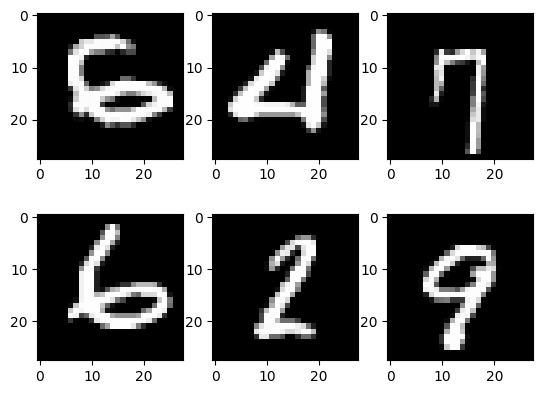

In [10]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap = 'gray')
plt.show()

In [12]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [17]:
model = NeuralNet(input_size, hidden_size, num_classes)
model = model.to(device)

In [18]:
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [19]:
# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1 28, 28
        # 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, steps {i+1} / {n_total_steps}, loss = {loss.item():.4f}')

# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        # value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'accuracy = {acc}')

epoch 1 / 2, steps 100 / 600, loss = 0.4422
epoch 1 / 2, steps 200 / 600, loss = 0.2979
epoch 1 / 2, steps 300 / 600, loss = 0.1821
epoch 1 / 2, steps 400 / 600, loss = 0.2651
epoch 1 / 2, steps 500 / 600, loss = 0.2348
epoch 1 / 2, steps 600 / 600, loss = 0.3339
epoch 2 / 2, steps 100 / 600, loss = 0.2635
epoch 2 / 2, steps 200 / 600, loss = 0.2728
epoch 2 / 2, steps 300 / 600, loss = 0.1473
epoch 2 / 2, steps 400 / 600, loss = 0.1449
epoch 2 / 2, steps 500 / 600, loss = 0.1483
epoch 2 / 2, steps 600 / 600, loss = 0.2780
accuracy = 95.42
